<center><b>Optimizing cost functions</b></center>
<center><b>Gradient Descent & Newton's method</b></center>

In [1]:
#Import statements
import numpy as np
import math
import matplotlib.pyplot as plt

<b>Cost function</b>
<br>
f(x, y) = -log(1-x-y) - logx - logy
<br>
Domain D = {(x, y): x+y < 1, x > 0, y > 0}

<b>Gradient Descent</b>

In [2]:
def getGradient(x, y):
    #df/dx = (1/1-x-y) - (1/x)
    df_dx = (1/(1-x-y)) - (1/x)
    
    #df/dy = (1/1-x-y) - (1/y)
    df_dy = (1/(1-x-y)) - (1/y)
    
    g = np.matrix([[df_dx], [df_dy]])
    return g

In [3]:
def domainSanityCheck(x, y):
    if (x+y) < 1 and x > 0 and y > 0:
        return True
    return False

In [4]:
def getCost(x, y):
    return -math.log(1-x-y) - math.log(x) - math.log(y)

In [5]:
def plotData(dataX, dataY, title, xLabel, yLabel):
    plt.plot(dataX, dataY)
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.show()
    
def plotWeights(weights):
    plotData(np.array(weights[0, :]).flatten(), np.array(weights[1, :]).flatten(), "Trajectory of data points", "w0", "w1")
    
def plotEnergy(cost):
    plotData(range(len(cost)), cost, "Energy updates", "Epoch", "Energy")

Initial weights:
 [[0.1]
 [0.5]]
Learning rate: 0.01
Minimized cost: 3.296255478256485
#Epochs for convergence: 35
Final weights:
 [[0.32663923]
 [0.34027609]]


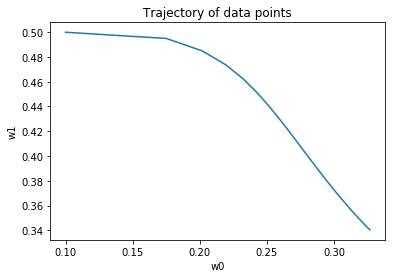

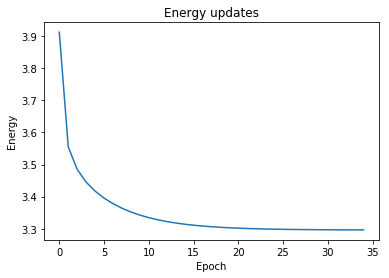

In [22]:
def gradientDescent(w, eta, threshold = 0.0001):
    weights_tracker = np.matrix(w)
    cost_tracker = [getCost(w[0, 0], w[1, 0])]
    epoch = 0
    while True:
        w = w - eta * getGradient(w[0, 0], w[1, 0])
        if not domainSanityCheck(w[0, 0], w[1, 0]):
            return None, None
        epoch = epoch + 1
        weights_tracker = np.append(weights_tracker, w, axis = 1)
        cost_tracker.append(getCost(w[0, 0], w[1, 0]))
        if abs(cost_tracker[-2] - cost_tracker[-1]) < threshold:
            break
    return weights_tracker, cost_tracker

#Random initial weights
w = np.matrix([0.1, 0.5])
w = w.reshape(2, 1)
#Initial learning rate
eta = 0.01
weights, cost = gradientDescent(w, eta)
if weights is None:
    print("Out of domain error")
else:
    print("Initial weights:\n", w)
    print("Learning rate:", eta)
    print("Minimized cost:", cost[-1])
    print("#Epochs for convergence:", len(cost))
    print("Final weights:\n", weights[:, -1])
    plotWeights(weights)
    plotEnergy(cost)

<b>Observations:</b>
<ul>
    <li>The initial weights are [0.1, 0.5].</li>
    <li>The convergence threshold is set to be the difference between subsequent energies being less than 0.0001</li>
    <li>On initializing eta as 1, the convergence iteration resulted in values outside the defined domain.</li>
    <li>Hence, the eta is set to 0.01 and convergence is achieved at 35 epochs with the minimum cost as 3.296</li>
</ul>

<b>Newton's method</b>

In [17]:
def getHessian(x, y):
    #df/dx^2 = (1/(1-x-y)^2) + (1/x^2)
    df_dxdx = (1/math.pow((1-x-y), 2)) + (1/math.pow(x, 2))
    
    #df/dxdy = df/dydx = (1/ (1-x-y)^2)
    df_dxdy = 1/math.pow((1-x-y), 2)
    
    #df/dy^2 = (1/(1-x-y)^2) + (1/y^2)
    df_dydy = (1/math.pow((1-x-y), 2)) + (1/math.pow(y, 2))
    
    H = np.matrix([[df_dxdx, df_dxdy], [df_dxdy, df_dydy]])
    
    return H

Initial weights:
 [[0.1]
 [0.5]]
Learning rate: 0.01
Minimized cost: 3.3008904365896274
#Epochs for convergence: 302
Final weights:
 [[0.30641316]
 [0.34824541]]


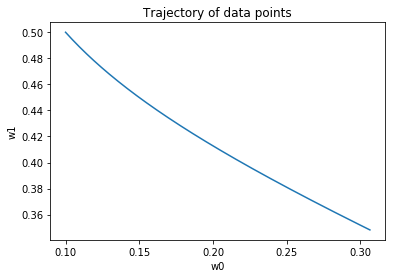

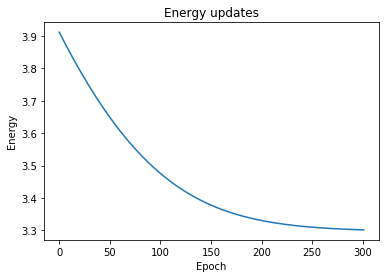

In [23]:
def newtonsMethod(w, eta, threshold = 0.0001):
    weights_tracker = np.matrix(w)
    cost_tracker = [getCost(w[0, 0], w[1, 0])]
    epoch = 0
    while True:
        w = w - (eta * np.matmul(np.linalg.pinv(getHessian(w[0, 0], w[1, 0])), getGradient(w[0, 0], w[1, 0])))
        if not domainSanityCheck(w[0, 0], w[1, 0]):
            return None, None
        epoch = epoch + 1
        weights_tracker = np.append(weights_tracker, w, axis = 1)
        cost_tracker.append(getCost(w[0, 0], w[1, 0]))
        if abs(cost_tracker[-2] - cost_tracker[-1]) < threshold:
            break
    return weights_tracker, cost_tracker

#Random initial weights
w = np.matrix([0.1, 0.5])
w = w.reshape(2, 1)
#Initial learning rate
eta = 0.01
weights, cost = newtonsMethod(w, eta)
if weights is None:
    print("Out of domain error")
else:
    print("Initial weights:\n", w)
    print("Learning rate:", eta)
    print("Minimized cost:", cost[-1])
    print("#Epochs for convergence:", len(cost))
    print("Final weights:\n", weights[:, -1])
    plotWeights(weights)
    plotEnergy(cost)

<b>Observations:</b>
<ul>
    <li>The initial weights are [0.1, 0.5].</li>
    <li>The convergence threshold is set to be the difference between subsequent energies being less than 0.0001</li>
    <li>The eta is set to 0.01 (same as Gradient Descent) and convergence is achieved at 302 epochs with the minimum cost as 3.300</li>
</ul>

<b>Comparison between Gradient Descent and Newton's method:</b>
<br>
<ul>
    <li>It is observed that the Gradient Descent method converges faster when compared to Newton's method for the same set of initial weights and learning rate.</li>
    <li>However, the learning rate could be a factor for the slowness of Newton's method.</li>
    <li>In order to verify it, the Newton's method is repeated with a higher learning rate.</li>
</ul>

<b>Setting eta = 1 for Newton's method</b>

Initial weights:
 [[0.1]
 [0.5]]
Learning rate: 1
Minimized cost: 3.295836866004332
#Epochs for convergence: 6
Final weights:
 [[0.33333331]
 [0.33333334]]


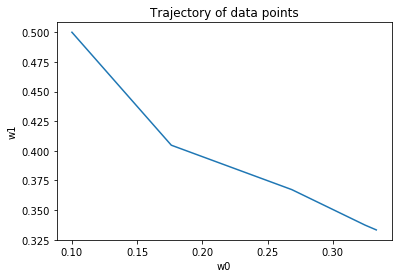

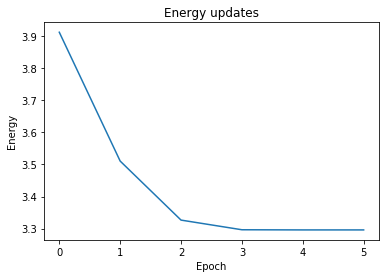

In [24]:
eta = 1
weights, cost = newtonsMethod(w, eta)
if weights is None:
    print("Out of domain error")
else:
    print("Initial weights:\n", w)
    print("Learning rate:", eta)
    print("Minimized cost:", cost[-1])
    print("#Epochs for convergence:", len(cost))
    print("Final weights:\n", weights[:, -1])
    plotWeights(weights)
    plotEnergy(cost)

<b>Observations:</b>
<ul>
    <li>It is observed that increasing the learning rate to 1 leads to Newton's method to converge faster at 6 epochs with a minimum cost of 3.296.</li>
    <li>Whereas, Gradient Descent resulted in values outside domain for higher learning rate, Newton's method benefits from a higher learning rate for this dataset and the given cost function.</li>
</ul>